In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [7]:
def tokenizer_corpus(corpus, num_words = -1):
    if num_words > -1:
        tokenizer = Tokenizer(num_words = num_words)
    else:
        tokenizer = Tokenizer()
    tokenizer.fit_on_texts(corpus)
    return tokenizer

In [8]:
def create_lyrics_corpus(dataset, field):
    dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), ' ')
    dataset[field] = dataset[field].str.lower()

    lyrics = dataset[field].str.cat()
    corpus = lyrics.split('\n')

    for l in range(len(corpus)):
        corpus[l] = corpus[l].rstrip()
    corpus = [l for l in corpus if l != ' ']

    return corpus

In [10]:
dataset = pd.read_csv("D:\Data Science\Datasets\songdata.csv", dtype = str)[:10]
corpus = create_lyrics_corpus(dataset, 'text')

tokenizer = tokenizer_corpus(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'you': 1, 'a': 2, 'i': 3, 'and': 4, 'me': 5, 'the': 6, 'is': 7, 'my': 8, 'to': 9, 'be': 10, 'ma': 11, 'it': 12, 'of': 13, "i'm": 14, 'your': 15, 'love': 16, 'so': 17, 'as': 18, 'boomerang': 19, 'that': 20, 'in': 21, 'andante': 22, 'boom': 23, 'make': 24, 'dumb': 25, 'on': 26, 'oh': 27, 'dum': 28, 'for': 29, 'but': 30, 'new': 31, 'bang': 32, "it's": 33, 'like': 34, 'know': 35, 'now': 36, 'how': 37, 'could': 38, "you're": 39, 'sing': 40, 'never': 41, 'no': 42, 'hum': 43, 'chiquitita': 44, 'can': 45, 'we': 46, 'song': 47, 'had': 48, 'good': 49, "you'll": 50, 'she': 51, 'just': 52, 'girl': 53, 'again': 54, 'will': 55, 'take': 56, 'please': 57, 'let': 58, 'am': 59, 'eyes': 60, 'was': 61, 'always': 62, 'cassandra': 63, 'blue': 64, 'time': 65, "don't": 66, 'were': 67, 'return': 68, 'once': 69, 'then': 70, 'sorry': 71, "cryin'": 72, 'over': 73, 'feel': 74, 'ever': 75, 'believe': 76, 'what': 77, 'do': 78, 'go': 79, 'all': 80, 'out': 81, 'think': 82, 'every': 83, 'leave': 84, 'look': 85, 'at': 

In [13]:
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequences = token_list[:i+1]
        sequences.append(n_gram_sequences)

max_seq_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen = max_seq_len, padding = 'pre'))

input_sequences, labels = sequences[:, :-1], sequences[:, -1]

one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [14]:
print(tokenizer.word_index['know'])
print(tokenizer.word_index['feeling'])

print(input_sequences[5])
print(input_sequences[6])

print(one_hot_labels[5])
print(one_hot_labels[6])

35
101
[  0   0   0   0   0   0   0   0   0   0   0   0   0  85  86 146 197  33
   2]
[  0   0   0   0   0   0   0   0   0   0   0   0  85  86 146 197  33   2
 285]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 64, input_length = (max_seq_len-1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(total_words, activation = 'softmax')
])

In [16]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [17]:
history = model.fit(input_sequences, one_hot_labels, epochs = 200, verbose = 1)

Epoch 1/200
65/65 [==============================] - 4s 8ms/step - loss: 5.9493 - accuracy: 0.0385
Epoch 2/200
65/65 [==============================] - 1s 9ms/step - loss: 5.4033 - accuracy: 0.0419
Epoch 3/200
65/65 [==============================] - 1s 9ms/step - loss: 5.3433 - accuracy: 0.0419
Epoch 4/200
65/65 [==============================] - 1s 8ms/step - loss: 5.2812 - accuracy: 0.0477
Epoch 5/200
65/65 [==============================] - 1s 9ms/step - loss: 5.2041 - accuracy: 0.0486
Epoch 6/200
65/65 [==============================] - 1s 9ms/step - loss: 5.1291 - accuracy: 0.0544
Epoch 7/200
65/65 [==============================] - 1s 9ms/step - loss: 5.0615 - accuracy: 0.0616
Epoch 8/200
65/65 [==============================] - 1s 9ms/step - loss: 4.9855 - accuracy: 0.0621
Epoch 9/200
65/65 [==============================] - 1s 9ms/step - loss: 4.9069 - accuracy: 0.0688
Epoch 10/200
65/65 [==============================] - 1s 9ms/step - loss: 4.8073 - accuracy: 0.0785
Epoch 11/

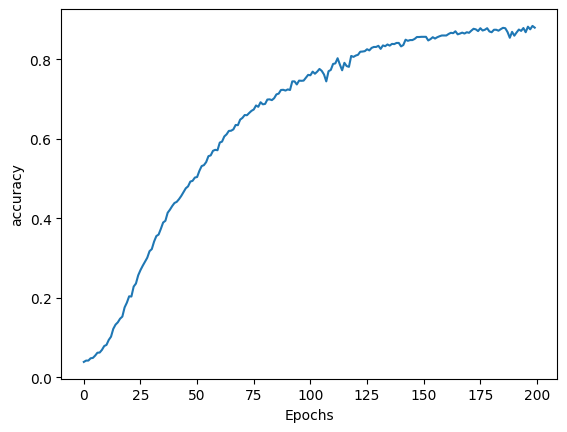

In [18]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, 'accuracy')

In [25]:
seed_text = "im feeling it"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 23ms/step
im feeling it used to be and even better hours and shining above you did before before i song song ground ground stood ways tedious ways song intention intention intention intention life is love for is a as is deep deep deep deep my break to much so come i do what to break so quiet quiet i came out candle so quiet quiet i bed they're of song tedious ways song heel intention intention intention intention life is to song heel song heel front advice is love is love a love for is something you anywhere and shining above you did before
